In [1]:
import torch 
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms 
import numpy as np

%matplotlib inline

c:\Users\rotem\anaconda3\envs\home\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [4]:
1001//10

100

In [3]:


def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    return torch.linspace(start, end, timesteps)

def get_index_from_list(vals, t, x_shape):
    """ 
    Returns a specific index t of a passed list of values vals
    while considering the batch dimension.
    """
    batch_size = t.shape[0]
    out = vals.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)

def forward_diffusion_sample(x_0, t, device="cpu"):
    """ 
    Takes an image and a timestep as input and 
    returns the noisy version of it
    """
    noise = torch.randn_like(x_0)
    sqrt_alphas_cumprod_t = get_index_from_list(sqrt_alphas_cumprod, t, x_0.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x_0.shape
    )
    # mean + variance xt = sqrt(alpha_cumprod)*X_0 +sqrt(1-alpha_cumprod)*epsilon 
    return sqrt_alphas_cumprod_t.to(device) * x_0.to(device) \
    + sqrt_one_minus_alphas_cumprod_t.to(device) * noise.to(device), noise.to(device)


# Define beta schedule
T = 1000
betas = linear_beta_schedule(timesteps=T)

# Pre-calculate different terms for closed form
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

In [4]:
T = 1000
betas = linear_beta_schedule(timesteps=T)

In [5]:
import argparse 

parser = argparse.ArgumentParser(description='model Config', add_help=False)


 

In [6]:
import torch.nn as nn
dn_layers = []

for i in range(3):

    if i<1:
        in_ch = 3
        out_ch =64 

    elif i == 3-1 :

        out_ch = 1
        
    
    else :
        in_ch = 64
        out_ch =64  


    dn_layers.extend([
        nn.Conv2d(in_ch,out_ch,3,1,dtype=torch.float32,padding="same"),
        nn.BatchNorm2d(out_ch,dtype=torch.float32),
        nn.ReLU(inplace=True),

    ])
        
    in_ch = out_ch

layer1 = nn.Sequential(*dn_layers)    

In [74]:
layer1[0]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [8]:
import torch 

inp = torch.randint(0,2,(1,3,32,32),dtype=torch.float32)


In [64]:
t = layer1(inp)

In [69]:
t[0,0,:4,:4]

tensor([[0.6589, 0.0000, 1.0088, 1.3626],
        [0.0000, 0.0000, 0.1619, 0.0000],
        [1.4537, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8447, 0.0000, 0.8758]], grad_fn=<SliceBackward0>)

In [56]:
folder = nn.Unfold(2,dilation=1, stride=4 )
t.unfold()

tensor([[0.0000, 2.4380, 3.5142, 2.3520, 2.6018, 3.3558, 2.6427, 2.3923, 2.3204],
        [2.4380, 0.0000, 3.4831, 2.9496, 2.2715, 3.9814, 2.7775, 2.1761, 2.6618],
        [3.5142, 3.4831, 0.0000, 2.8329, 3.5670, 3.3710, 2.8182, 2.5709, 2.9353],
        [2.3520, 2.9496, 2.8329, 0.0000, 2.7028, 2.5917, 1.8690, 2.0043, 2.0308],
        [2.6018, 2.2715, 3.5670, 2.7028, 0.0000, 3.8643, 2.4621, 2.2272, 2.4157],
        [3.3558, 3.9814, 3.3710, 2.5917, 3.8643, 0.0000, 3.0101, 2.9488, 3.2875],
        [2.6427, 2.7775, 2.8182, 1.8690, 2.4621, 3.0101, 0.0000, 1.8985, 1.2916],
        [2.3923, 2.1761, 2.5709, 2.0043, 2.2272, 2.9488, 1.8985, 0.0000, 1.9530],
        [2.3204, 2.6618, 2.9353, 2.0308, 2.4157, 3.2875, 1.2916, 1.9530, 0.0000]],
       grad_fn=<SliceBackward0>)


torch.Size([64, 64])

tensor([[0.6589, 0.0000, 1.0088, 1.3626, 0.0000, 0.0000, 0.1619, 0.0000, 1.4537,
         0.0000, 0.0000, 0.0000, 0.0000, 0.8447, 0.0000, 0.8758]],
       grad_fn=<SliceBackward0>)

tensor([[[0., 0., 1.,  ..., 1., 0., 1.],
         [1., 1., 0.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 0., 1., 1.],
         ...,
         [1., 0., 0.,  ..., 1., 1., 1.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 1., 0.]]])

RuntimeError: The size of tensor a (256) must match the size of tensor b (32) at non-singleton dimension 3

Files already downloaded and verified
Files already downloaded and verified


C:\Users\rotem\AppData\Local\Temp\ipykernel_33684\482698904.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, num_images+1, int(idx/stepsize) + 1)


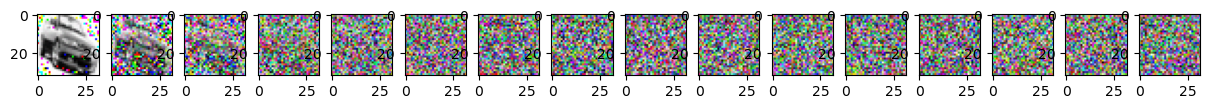

In [1]:
import torch.nn as nn
import torch

from torchmetrics.image.fid import FrechetInceptionDistance
from torchvision import transforms 
import torchvision
fid = FrechetInceptionDistance(feature=64,normalize=True)

# generate two slightly overlapping image intensity distributions

# TODO: add loader to CIFAR10 to imgs_dist1 to tesnor with type torch.uint8)

data_transforms = [
        transforms.Resize((32, 32)),
        transforms.ToTensor(), # Scales data into [0,1] 
        # transforms.Lambda(lambda t: (t * 2) - 1) # Scale between [-1, 1] 
    ]
data_transform = transforms.Compose(data_transforms)

imgs_dist1 = torchvision.datasets.CIFAR10(root="/home/robotics20/Documents/deep/KNN_diffusion/rotem/deffiusio_model/data", download=True,
                                         train=True, 
                                         transform=data_transform)

data = imgs_dist1.data.reshape(-1,3,32,32)
data = torch.tensor(data)
# imgs_dist1 = torch.randint(0, 200, (100, 3, 299, 299), dtype=torch.uint8)
# TODO: add generated img tensor same size as CIFAR data set 
imgs_dist2 = torch.randint(0, 1, (100, 3, 32, 32), dtype=torch.uint8)

fid.update(data[:100], real=True)
fid.update(imgs_dist2, real=False)
fid = fid.compute()

print(fid)

Files already downloaded and verified
tensor(68.6405)


(50000, 3, 32, 32)